In [1]:
from sympy import *
import pandas as pd
init_printing(use_unicode=True)
from sympy.plotting import plot

x = symbols('x')


T1

In [2]:
def taylor(expr_str, n, x0):
    init_printing(use_unicode=True)
    x = symbols('x')

    f = parse_expr(expr_str)

    components = [(diff(f, x, i).subs(x,x0)*(x-x0)**i)/factorial(i) for i in range(0, n)]
    approx = sum(components)

    fn = IndexedBase("f")
    p_approx_expr = plot(approx, show=False, label=fn[n], legend=true)
    p_approx_expr.append(plot(f, show=False, label = "f")[0])
    
    p_approx_components = plot(approx, show=False, label=fn[n], legend=true)
    an = IndexedBase("a")
    for i in range(0,n):
        p_approx_components.append(plot(components[i], label = an[i], show=False)[0])

    return components, approx, p_approx_expr, p_approx_components

T2

In [3]:
def taylor2(expr_str: str, n1, n2, x0):
    x = symbols('x')
    
    n2=n2+1
    f = parse_expr(expr_str)

    components = [(diff(f, x, i).subs(x,x0)*(x-x0)**i)/factorial(i) for i in range(0, n2)]
    approximations = [sum(components[0:i]) for i in range(n1, n2+1)]

    p = plot(f, show=False, label="f", legend=true)
    fn = IndexedBase("f")
    for n in range(n1,n2):
        p.append(plot(approximations[n-n1], label = fn[n], show=False)[0])

    return approximations, p

T3

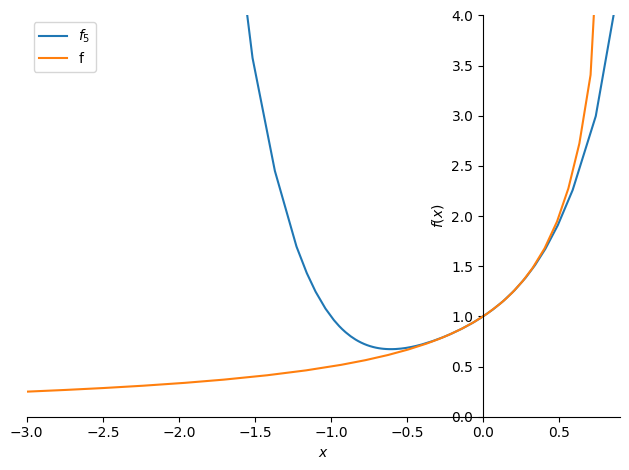

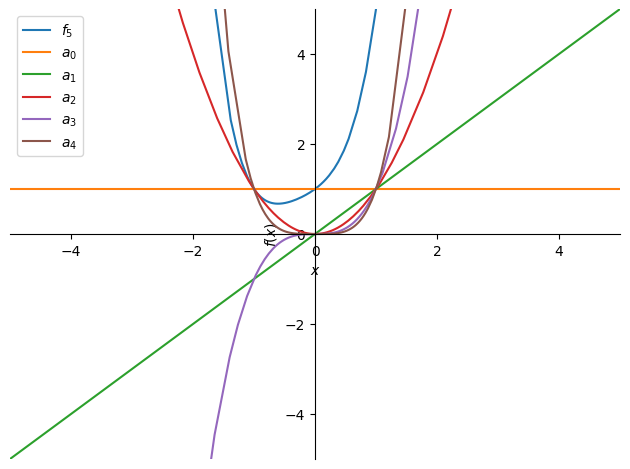

In [16]:
n=5
skladowe, przybliz, p1, p2 = taylor("1/(1-x)", n, 0)
an = IndexedBase("a")
fn = IndexedBase("f")
for i in range(0,n):
    display(Eq(an[i],skladowe[i].evalf(5)))

display(Eq(fn[n],przybliz))

p1.xlim=(-3,0.9)
p1.ylim=(0,4)
p1.show()

p2.xlim=(-5,5)
p2.ylim=(-5,5)
p2.show()

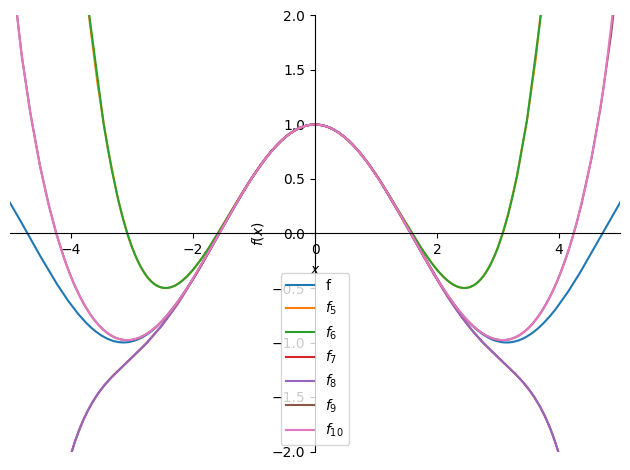

In [5]:
n1,n2=5,10
przyblizenia, p = taylor2("cos(x)", n1, n2, 0)
fn = IndexedBase("f")
for i in range(n1,n2+1):
    display(Eq(fn[i],przyblizenia[i-n1].evalf(5)))
p.xlim=(-5,5)
p.ylim=(-2,2)
p.show()

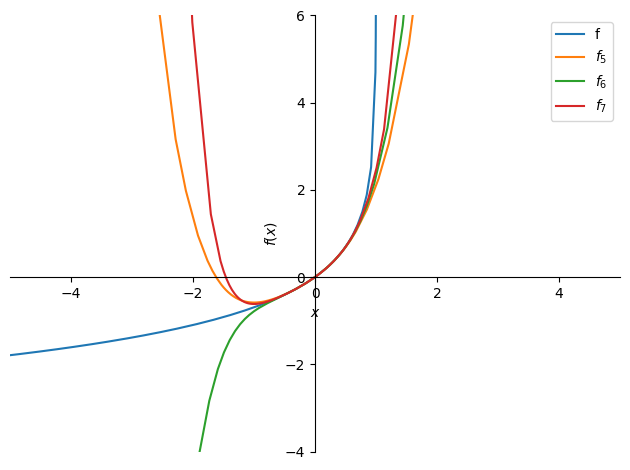

In [6]:
n1,n2=5,7
przyblizenia, p = taylor2("ln(1/(1-x))", n1, n2, 0)
fn = IndexedBase("f")
for i in range(n1,n2+1):
    display(Eq(fn[i],przyblizenia[i-n1].evalf(5)))
p.xlim=(-5,5)
p.ylim=(-4,6)
p.show()

F1

In [7]:
def fourier(f: Expr, N):
    x = symbols('x')

    a = [(1 / pi * integrate(f * cos(i * x), (x, -pi, pi))) for i in range(0, N+1)]
    b = [(1 / pi * integrate(f * sin(i * x), (x, -pi, pi))) for i in range(1, N+1)]

    components = [a[i]*cos(i*x)+b[i-1]*sin(i*x) for i in range(1, N+1)]
    a0 = 1 / pi * integrate(f * cos(0 * x), (x, -pi, pi))

    approx = a0/2 + sum(components)
    
    fsn = IndexedBase("fs")
    fn = IndexedBase("f")
    p = plot(approx, show=False, label=fn[N], legend=true)
    p.append(plot(f, label = "f", show=False)[0]) 
    
    for i in range(0, N):
        p.append(plot(components[i], label = fsn[i+1], show=False)[0])

    return components, approx, p 


F2

In [8]:
def fourier2(f: Expr, n1, n2, verbose=False):
    x = symbols('x')
    
    a = [(1 / pi * integrate(f * cos(i * x), (x, -pi, pi))) for i in range(0, n2+1)]
    b = [(1 / pi * integrate(f * sin(i * x), (x, -pi, pi))) for i in range(1, n2+1)]

    if verbose:
        an = IndexedBase("a")
        bn = IndexedBase("b")
        for i in range(0, n2+1):
            display(Eq(an[i], a[i].evalf(5)))
        for i in range(1, n2+1):
            display(Eq(bn[i], b[i-1].evalf(5)))

    components = [a[i]*cos(i*x)+b[i-1]*sin(i*x) for i in range(1, n2+1)]
    a0 = 1 / pi * integrate(f * cos(0 * x), (x, -pi, pi))

    approximations = [a0/2 + sum(components[0:i]) for i in range(n1, n2+1)]
    
    fsn = IndexedBase("fs")
    fn = IndexedBase("f")

    p = plot(f, show=False, label="f", legend=true)
    
    for i in range(n1, n2+1):
        p.append(plot(approximations[i-n1], label = fsn[i+1], show=False)[0])

    return approximations, p 

⎧x + π   for x ≥ -π ∧ x < 0
⎪                          
⎪  0         for x = 0     
⎨                          
⎪ 2                        
⎪x  - π  for x ≤ π ∧ x > 0 
⎩                          

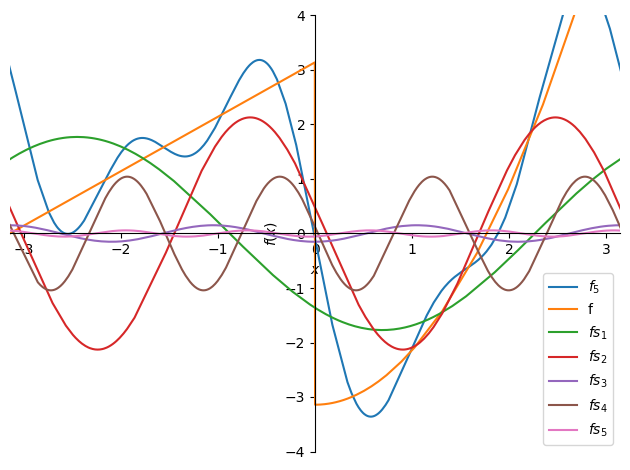

In [9]:
n=5
funkcja = Piecewise((x+pi, (-pi<=x) &(x<0)), 
                    (0, Eq(x, 0)), 
                    (x**2-pi, (x>0)&(x<=pi))) 
display(funkcja)

skladowe, przybliz, p = fourier(funkcja, n)
fsn = IndexedBase("fs")
fn = IndexedBase("f")

for i in range(1,n+1):
    display(Eq(fsn[i],skladowe[i-1].evalf(5)))

display(Eq(fn[n],przybliz.evalf(5)))

p.xlim=(-3.14,3.14)
p.ylim=(-4, 4)
p.show()


⎧x + π   for x ≥ -π ∧ x < 0
⎪                          
⎪  0         for x = 0     
⎨                          
⎪ 2                        
⎪x  - π  for x ≤ π ∧ x > 0 
⎩                          

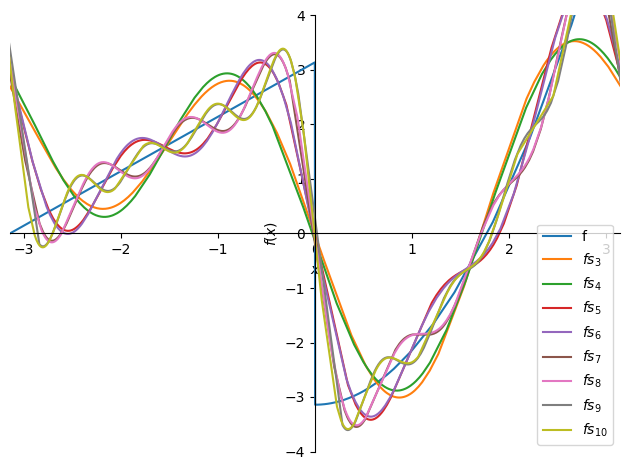

In [10]:
funkcja = Piecewise((x+pi, (-pi<=x) &(x<0)), 
                    (0, Eq(x, 0)), 
                    (x**2-pi, (x>0)&(x<=pi))) 
n1, n2=2,9

display(funkcja)
przybliz, p = fourier2(funkcja, n1, n2)

fn = IndexedBase("f")

for i in range(n1,n2+1):
    display(Eq(fn[i],przybliz[i-n1].evalf(5)))

p.xlim=(-3.14,3.14)
p.ylim=(-4, 4)
p.show()

F3

In [11]:
def get_info(funkcja, n1, n2, numbers):
    display(funkcja)
    plot(funkcja)
    przybliz, p = fourier2(funkcja, n1, n2, verbose=True)

    tab = {}
    values = [-3/4*pi, -1/2*pi, -1/4*pi, 1/4*pi, 1/2*pi, 3/4*pi]
    for v in values:
        column = []
        for i in numbers:
            column.append(przybliz[i-n1].subs(x, v).evalf(5))
        column.append(funkcja.subs(x,v).evalf(5))
        tab[v] = column

    indexes = ["f"+str(i) for i in numbers]
    indexes.append("f(x)")
    tab_df = pd.DataFrame(tab,
                        index=indexes,
                        columns=values)
    display(tab_df)

⎧x + π   for x ≥ -π ∧ x < 0
⎪                          
⎪  0         for x = 0     
⎨                          
⎪ 2                        
⎪x  - π  for x ≤ π ∧ x > 0 
⎩                          

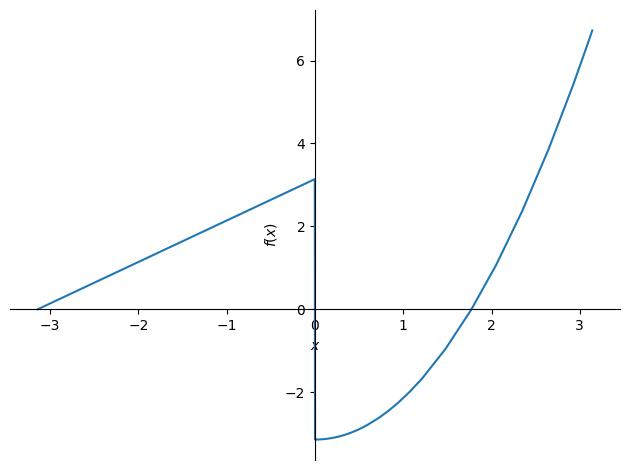

,-0.75*pi,-0.5*pi,-0.25*pi,0.25*pi,0.5*pi,0.75*pi
f2,0.55299,1.4912,2.7665,-2.9755,-0.77211,3.0942
f5,0.29510,1.5981,2.7999,-2.9676,-0.62902,2.8107
f8,1.0480,1.5903,2.1329,-2.2775,-0.66984,2.1597
f(x),0.78540,1.5708,2.3562,-2.5247,-0.67419,2.4101


In [12]:
funkcja = Piecewise((x+pi, (-pi<=x) &(x<0)), 
                    (0, Eq(x, 0)), 
                    (x**2-pi, (x>0)&(x<=pi))) 
n1, n2=2,9
numbers = [2,5,8]

get_info(funkcja, n1, n2, numbers)

F4

⎧x + π  for x ≥ -π ∧ x < 0
⎪                         
⎨  0        for x = 0     
⎪                         
⎩x - π  for x ≤ π ∧ x > 0 

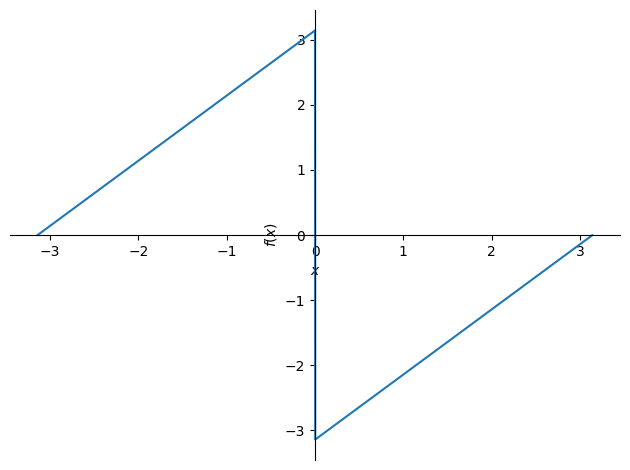

,-0.75*pi,-0.5*pi,-0.25*pi,0.25*pi,0.5*pi,0.75*pi
f2,0.41421,2.0000,2.4142,-2.4142,-2.0000,-0.41421
f4,0.88562,1.3333,2.8856,-2.8856,-1.3333,-0.88562
f6,0.93611,1.7333,2.2694,-2.2694,-1.7333,-0.93611
f(x),0.78540,1.5708,2.3562,-2.3562,-1.5708,-0.78540


In [13]:
funkcja = Piecewise((x+pi, (-pi<=x) &(x<0)), 
                    (0, Eq(x, 0)), 
                    (x-pi, (x>0)&(x<=pi))) 
n1, n2=2,6
numbers = [2,4,6]

get_info(funkcja, n1, n2, numbers)

F5

⎧-x - π  for x ≥ -π ∧ x ≤ 0
⎨                          
⎩x - π   for x ≤ π ∧ x > 0 

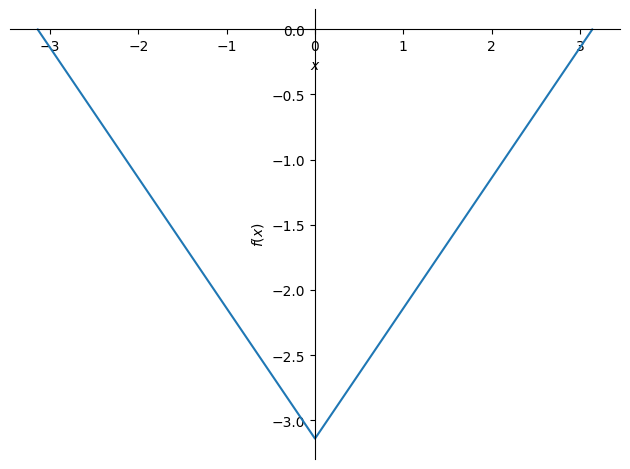

,-0.75*pi,-0.5*pi,-0.25*pi,0.25*pi,0.5*pi,0.75*pi
f1,-0.67048,-1.5708,-2.4711,-2.4711,-1.5708,-0.67048
f3,-0.77052,-1.5708,-2.3711,-2.3711,-1.5708,-0.77052
f5,-0.80653,-1.5708,-2.3351,-2.3351,-1.5708,-0.80653
f(x),-0.78540,-1.5708,-2.3562,-2.3562,-1.5708,-0.78540


In [14]:
funkcja = Piecewise((-x-pi, (-pi<=x) &(x<=0)), 
                    (x-pi, (x>0)&(x<=pi))) 
n1, n2=1,6
numbers = [1,3,5]

get_info(funkcja, n1, n2, numbers)